<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/Copy_of_Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/project_2_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1460 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            1460 non-null   object 
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

In [ ]:
data['interactive'] = (data['TotalBsmtSF']/2) * (data['FullBath']/2)
data['loginteractive'] = np.log(data['interactive'])
data['sqrtinteractive'] = np.sqrt(data['interactive'])
data['inter'] = (data['GarageArea']) * (data['GarageCars'])
data['loginter'] = np.log(data['inter'])
data['sqrtinter'] = np.sqrt(data['inter'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
correlation_with_saleprice = data.corr(numeric_only=True) # Calculate correlation only for numeric columns
correlation_with_saleprice = correlation_with_saleprice['logSalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

logSalePrice       1.000000
SalePrice          0.948374
OverallQual        0.817184
sqrtinteractive    0.711947
GrLivArea          0.700927
interactive        0.700271
GarageCars         0.680625
inter              0.672054
GarageArea         0.650888
TotalBsmtSF        0.612134
1stFlrSF           0.596981
FullBath           0.594771
YearBuilt          0.586570
YearRemodAdd       0.565608
TotRmsAbvGrd       0.534422
GarageYrBlt        0.500449
Fireplaces         0.489449
MasVnrArea         0.429531
BsmtFinSF1         0.372023
LotFrontage        0.336156
WoodDeckSF         0.334135
OpenPorchSF        0.321053
2ndFlrSF           0.319300
HalfBath           0.313982
LotArea            0.257320
BsmtFullBath       0.236224
BsmtUnfSF          0.221985
BedroomAbvGr       0.209044
ScreenPorch        0.121208
PoolArea           0.069798
MoSold             0.057329
3SsnPorch          0.054900
BsmtFinSF2         0.004832
BsmtHalfBath      -0.005149
Id                -0.017942
MiscVal           -0

In [ ]:
data['logSalePrice'] = np.log(data['SalePrice'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# تحميل البيانات
data = pd.read_csv("/content/project_2_data.csv")

data['logSalePrice'] = np.log(data['SalePrice'])
data['interactive'] = (data['TotalBsmtSF']) * (data['FullBath'])
data['sqrtinteractive'] = np.sqrt(data['interactive'])
data['inter'] = (data['GarageArea']) * (data['GarageCars'])
data['interactive2'] = data['TotRmsAbvGrd'] * data['1stFlrSF']
data['sqrtinteractive2'] = np.sqrt(data['interactive2'])
features = ['OverallQual','sqrtinteractive2','inter','interactive']
X = data[features]
y = data["logSalePrice"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)



# تقييم
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# اختيار نموذج Lasso
lasso = Lasso(alpha=0.1)  # يمكنك ضبط قيمة alpha
lasso.fit(X_train_scaled, y_train)

# التنبؤ
y_pred = lasso.predict(X_test_scaled)

# تقييم
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# التثبيت المتقاطع
scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Mean Squared Error: 0.05388040439634176
Cross-Validation Scores: [0.66897944 0.62283702 0.65064207 0.64699603 0.69447611]
Mean CV Score: 0.6567861331745137


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# افترض أن X هي مصفوفة المميزات و y هو متجه الأسعار

# تقسيم البيانات إلى تدريب واختبار


# اختيار أفضل 5 مميزات باستخدام f_regression
selector = SelectKBest(f_regression, k=4)
X_train_new = selector.fit_transform(X_train, y_train)

# تدريب نموذج الغابات العشوائية
rf = RandomForestRegressor()
rf.fit(X_train_new, y_train)

# الحصول على أهمية المميزات
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# طباعة أهمية المميزات
for f in range(X_train_new.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.546677)
2. feature 3 (0.183404)
3. feature 1 (0.162099)
4. feature 2 (0.107820)


In [ ]:
Corelation_Cofficient = np.corrcoef(X['OverallQual'], y)[0, 1]
print(f'Corelation Cofficient between Sale Price and OverallQual {Corelation_Cofficient}')

Corelation Cofficient between Sale Price and OverallQual 0.8171844179216825


In [ ]:
Corelation_Cofficient = np.corrcoef(X['sqrtinteractive2'], y)[0, 1]
print(f'Corelation Cofficient between Sale Price and sqrtinteractive2 {Corelation_Cofficient}')

Corelation Cofficient between Sale Price and sqrtinteractive2 0.6734778870362463


In [ ]:
Corelation_Cofficient = np.corrcoef(X['inter'], y)[0, 1]
print(f'Corelation Cofficient between Sale Price and inter {Corelation_Cofficient}')

Corelation Cofficient between Sale Price and inter 0.6720537129418956


In [ ]:
Corelation_Cofficient = np.corrcoef(X['interactive'], y)[0, 1]
print(f'Corelation Cofficient between Sale Price and interactive {Corelation_Cofficient}')

Corelation Cofficient between Sale Price and interactive 0.7002707189283726


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("a = ", model.coef_)
print("b = ",model.intercept_)

a =  [1.58314046e-01 4.53889971e-03 1.01881508e-04 1.75044655e-05]
b =  10.537895377332498


In [ ]:
predictions = model.predict(X_test)

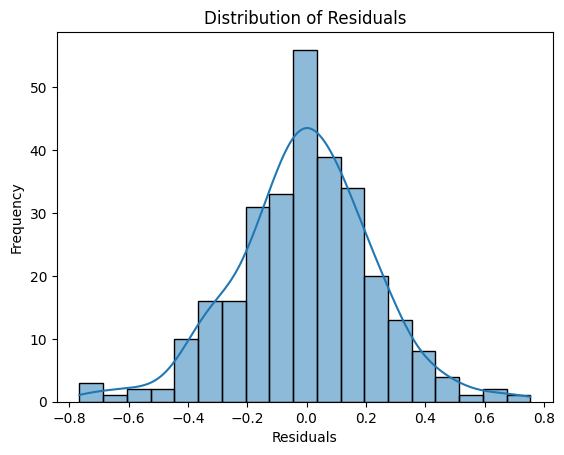

In [ ]:
error = y_test - y_pred
sns.histplot(error, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

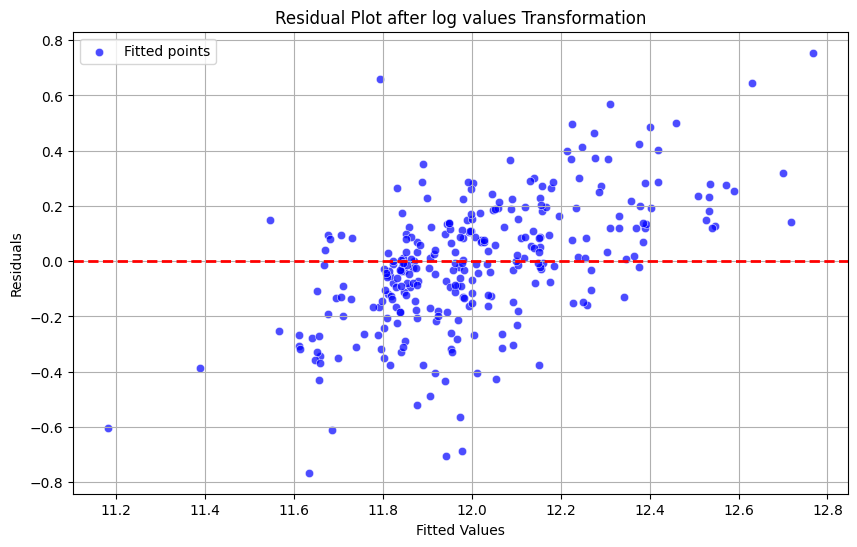

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_pred, y = error, alpha = 0.7, label = 'Fitted points', color = 'b')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot after log values Transformation')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)

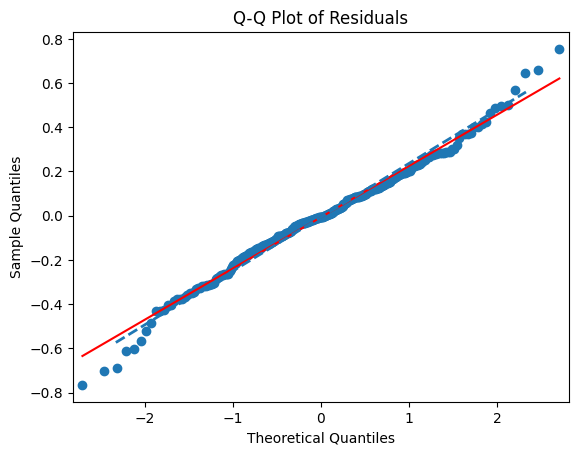

In [ ]:
import statsmodels.api as sm


# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Train model using statsmodels
model = sm.OLS(y, X).fit()

# Get residuals
error =  y_test - y_pred

# Create Q-Q plot with standardized line
sm.qqplot(error.values.ravel(), dist=stats.norm, line='s', ax=plt.gca())

# Add a smoothed line
z = np.polyfit(stats.norm.ppf(np.linspace(0.01, 0.99, len(error))), np.sort(error), 1)
p = np.poly1d(z)
plt.plot(stats.norm.ppf(np.linspace(0.01, 0.99, len(error))), p(stats.norm.ppf(np.linspace(0.01, 0.99, len(error)))), linestyle='--', linewidth=2)

plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
error = y_test - y_pred

stat, p = stats.shapiro(error)


print('Shapiro-Wilk Test:')
print('Statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p > alpha: # Comparing the single p-value from the Shapiro-Wilk test to alpha
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

plt.show()

Shapiro-Wilk Test:
Statistic: 0.9903677671728381
p-value: 0.05164377448698971
Sample looks Gaussian (fail to reject H0)


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan



X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Ensure residuals is a 1D array (Series)
residuals = model.resid

# Perform Breusch-Pagan test
test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, test)))

{'Lagrange multiplier statistic': 111.51560075989002, 'p-value': 3.457168347980475e-23, 'f-value': 30.081030080339293, 'f p-value': 4.454211901666567e-24}


In [ ]:
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           logSalePrice   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.603e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                        0.00
Time:                        16:07:00   Log-Likelihood:                         -2211.5
No. Observations:                1168   AIC:                                      4431.
Df Residuals:                    1164   BIC:                                      4451.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

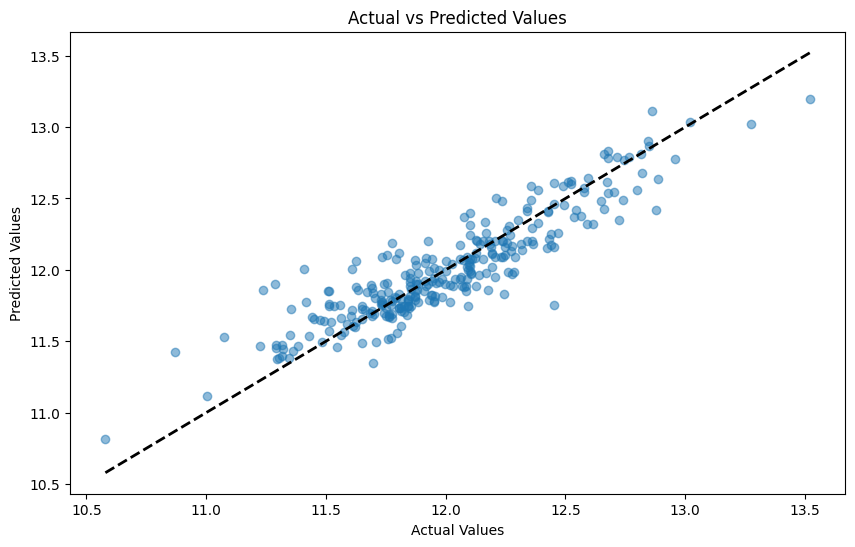

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

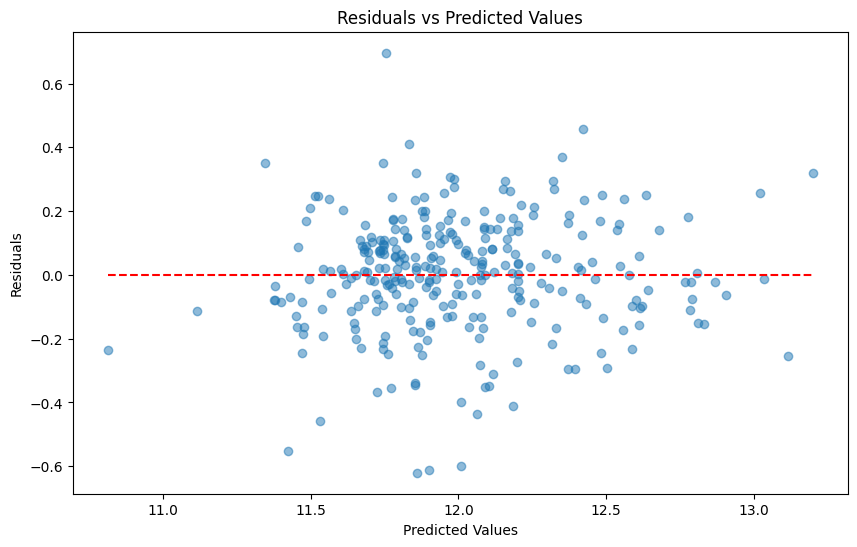

In [ ]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')

print(f'Mean Squared Error (MSE): {mse}')

print(f'Root Mean Squared Error (RMSE): {rmse}')

print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.13630522535275116
Mean Squared Error (MSE): 0.0326539294989168
Root Mean Squared Error (RMSE): 0.18070398307429972
R-squared (R2): 0.8125074347039326


In [ ]:
# prompt: create new data to predict sale price

import pandas as pd
import numpy as np
# Create a new DataFrame with the same features as your training data
new_data = pd.DataFrame({
    'OverallQual': [8],  # Replace with your desired values
    'sqrtinteractive2': [250],  # Replace with your desired values
    'inter': [600],  # Replace with your desired values
    'interactive': [1500]  # Replace with your desired values
})


# Scale the new data using the same scaler you used for training
new_data_scaled = scaler.transform(new_data)

# Make predictions using your trained model
predicted_log_sale_price = lasso.predict(new_data_scaled)

# Convert the predicted log sale price back to the original sale price scale (if needed)
predicted_sale_price = np.exp(predicted_log_sale_price)

print(f"Predicted Sale Price: {predicted_sale_price[0]}")


Predicted Sale Price: 316800.50210399186
